# Hello World of deep learning

Simple house price prediction model


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
def house_model(new_X):
  X = np.array([1, 2, 3, 4, 5, 6, 7], dtype=float)
  Y = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4], dtype=float)
  model = keras.Sequential([keras.layers.Dense(1, input_shape=[1])])
  model.compile(optimizer='sgd', loss='mean_squared_error')
  model.fit(X, Y, epochs=300)
  return model.predict(new_X)

In [ ]:
prediction = house_model([10.0])[0]
print(prediction)

Epoch 1/300
1/1 [==============================] - 0s 1ms/step - loss: 0.0553
Epoch 2/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0518
Epoch 3/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0504
Epoch 4/300
1/1 [==============================] - 0s 1ms/step - loss: 0.0496
Epoch 5/300
1/1 [==============================] - 0s 1ms/step - loss: 0.0491
Epoch 6/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0487
Epoch 7/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0483
Epoch 8/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0480
Epoch 9/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0476
Epoch 10/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0472
Epoch 11/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0469
Epoch 12/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0465
Epoch 13/300
1/1 [==============================] - 0s 2ms/st

# Load Data

for the integrated data, simply call `.load_data()` method of the dataset.

A simple computer vision example using `Fashion_mnist` as following 

In [ ]:
print(tf.__version__)

2.3.0


In [ ]:
# The Fashion MNIST data is available directly in the tf.keras datasets API. 
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


[[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0
   85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217
  231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191
  168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174
  195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184
  185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191
  193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191
  194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172
  170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 153 160 164 158 157 15

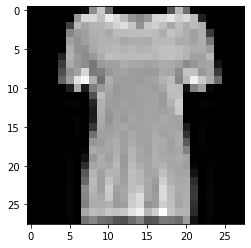

In [ ]:
import matplotlib.pyplot as plt

# display one example
plt.imshow(train_X[10], cmap='gray')
print(train_X[10])
print(train_Y[10])

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

In [ ]:
EPOCHS = 10

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_X, train_Y, epochs=EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4859 - accuracy: 0.8359
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4684 - accuracy: 0.8411
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4654 - accuracy: 0.8430
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4638 - accuracy: 0.8425
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4600 - accuracy: 0.8440
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4596 - accuracy: 0.8457
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4554 - accuracy: 0.8456
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4466 - accuracy: 0.8497
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4427 - accuracy: 0.8503
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.446

In [ ]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 0s 1ms/step - loss: 0.5647 - accuracy: 0.8220


[0.564749538898468, 0.8220000267028809]

# Using callback to control training process

In [ ]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.7):
      print("\nReached accuracy requirement = 0.7, cancelling the training")
      self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
# normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0
# initialize callback
callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.4760 - accuracy: 0.8307
Reached accuracy requirement = 0.7, cancelling the training
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4761 - accuracy: 0.8307


# Convolutional NN

Try use CNN to train the same fashion mnist dataset. Basic concept of Convolutional Neural Networks: Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focussed, and possibly more accurate.

In [ ]:
x_train.shape

(60000, 28, 28)

Reshape is because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list (like previously without Con2D layer), we have a single 4D list that is 60,000x28x28x1, and the same for the test images. 

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
CNN_model = keras.Sequential([
  keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Conv2D(64, (3,3), activation='relu'),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Flatten(),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

A MaxPooling layer which is then designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. 


In [ ]:
# Overview of model
CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               409856    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached accuracy requirement = 0.7, cancelling the training")
      self.model.stop_training = True

In [ ]:
callbacks = myCallback()

CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
CNN_model.fit(x_train, y_train, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.3372 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.2610 - accuracy: 0.9031
Epoch 3/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.2205 - accuracy: 0.9180
Epoch 4/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1915 - accuracy: 0.9288
Epoch 5/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1634 - accuracy: 0.9383


In [ ]:
# evaluation on test set
test_loss = CNN_model.evaluate(x_test, y_test)
print("loss on test set: ", test_loss[0], "accuracy on test set", test_loss[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.2624 - accuracy: 0.9077
loss on test set:  0.26236608624458313 accuracy on test set 0.9077000021934509


# Horse-Human-Classification

## Load data

In [4]:
import os
import zipfile

In [6]:
# download dataset in the form of zipfile
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-08-27 12:39:09--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   125MB/s    in 1.1s    

2020-08-27 12:39:11 (125 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [7]:
zipfile_path = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(zipfile_path, 'r')
# extracte zipfile under the given path
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [8]:
cd '/tmp/horse-or-human'

/tmp/horse-or-human


In [ ]:
ls

horses/  humans/


In [9]:
# set directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# set directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [10]:
# print some names of the images 
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)
print(train_horse_names[:5])
print(train_human_names[:5])

['horse22-1.png', 'horse46-1.png', 'horse26-9.png', 'horse23-7.png', 'horse05-9.png']
['human05-15.png', 'human09-09.png', 'human16-14.png', 'human07-19.png', 'human14-23.png']


In [11]:
# total numbers of training images
print("the number of training images of horses: ", len(train_horse_names))
print("the number of training images of humans: ", len(train_human_names))

the number of training images of horses:  500
the number of training images of humans:  527


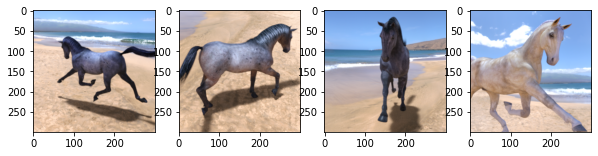

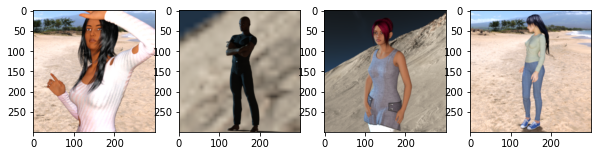

In [12]:
%matplotlib inline

# display some images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def read_image(num, dir, names):
  for i in range(num):
    index = np.random.randint(500)
    image_path = os.path.join(dir, names[index])
    img = mpimg.imread(image_path)
    plt.subplot(1, num, i+1)
    plt.imshow(img)

plt.figure(figsize = (10,40))
read_image(4, train_horse_dir, train_horse_names)
plt.figure(figsize = (10,40))
read_image(4, train_human_dir, train_human_names)



## Build Model

In [13]:
horse_human_model = keras.Sequential([
  keras.layers.Conv2D(16, (3,3), input_shape=(300, 300, 3), activation='relu'),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Conv2D(32, (3,3), activation='relu'),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Conv2D(64, (3,3), activation='relu'),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Conv2D(64, (3,3), activation='relu'),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
horse_human_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [15]:
from tensorflow.keras.optimizers import RMSprop
horse_human_model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

## Data preprocessing

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255)

# Generate data flow using generator, data will be labelled with the correct name of the directories
train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
) 

Found 1027 images belonging to 2 classes.


## Train data using generator

In [17]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached accuracy requirement = 0.95, cancelling the training")
      self.model.stop_training = True

In [18]:
callbacks = myCallback()

history = horse_human_model.fit(
    train_generator,
    steps_per_epoch=8, # 8 = 1024(total images) / 128(batch_size)
    epochs=15,
    callbacks=[callbacks])

Epoch 1/15
8/8 [==============================] - 5s 617ms/step - loss: 1.1948 - accuracy: 0.5695
Epoch 2/15
8/8 [==============================] - 6s 805ms/step - loss: 0.5776 - accuracy: 0.6418
Epoch 3/15
8/8 [==============================] - 5s 666ms/step - loss: 0.5796 - accuracy: 0.7764
Epoch 4/15
8/8 [==============================] - 5s 674ms/step - loss: 0.7817 - accuracy: 0.7464
Epoch 5/15
8/8 [==============================] - 5s 672ms/step - loss: 0.2499 - accuracy: 0.9232
Epoch 6/15
8/8 [==============================] - 6s 762ms/step - loss: 0.1686 - accuracy: 0.9297
Epoch 7/15
8/8 [==============================] - 5s 664ms/step - loss: 0.1246 - accuracy: 0.9499
Epoch 8/15
8/8 [==============================] - ETA: 0s - loss: 0.0939 - accuracy: 0.9633
Reached accuracy requirement = 0.95, cancelling the training
8/8 [==============================] - 5s 665ms/step - loss: 0.0939 - accuracy: 0.9633


## Predict

In [21]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  #predict image
  img_path = '/content/' + fn
  img = image.load_img(img_path, target_size=(300,300))
  # image to numpy array
  x = image.img_to_array(img)

  # turn single image into image batch, because the input of the model has to be image batch
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = horse_human_model.predict(images)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving images.jpeg to images.jpeg


FileNotFoundError: ignored

## Using Valdation set to retrain the model

### Load validation data

In [22]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-08-27 12:57:49--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  56.6MB/s    in 0.2s    

2020-08-27 12:57:50 (56.6 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [23]:
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [24]:
# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [25]:
validation_horse_hames = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total validation horse images: 128
total validation human images: 128


### Creates Data generator of validation data

In [27]:
validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 256 images belonging to 2 classes.


In [28]:
# train model with training and validation datasets
history = horse_human_model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 8s 1s/step - loss: 0.1361 - accuracy: 0.9522 - val_loss: 1.3004 - val_accuracy: 0.6992
Epoch 2/15
8/8 [==============================] - 7s 866ms/step - loss: 3.8590 - accuracy: 0.7664 - val_loss: 1.0223 - val_accuracy: 0.6953
Epoch 3/15
8/8 [==============================] - 7s 847ms/step - loss: 0.1431 - accuracy: 0.9533 - val_loss: 0.6295 - val_accuracy: 0.8906
Epoch 4/15
8/8 [==============================] - 7s 876ms/step - loss: 0.0533 - accuracy: 0.9811 - val_loss: 0.8149 - val_accuracy: 0.8672
Epoch 5/15
8/8 [==============================] - 7s 866ms/step - loss: 0.0170 - accuracy: 0.9956 - val_loss: 1.1262 - val_accuracy: 0.8789
Epoch 6/15
8/8 [==============================] - 7s 853ms/step - loss: 0.1073 - accuracy: 0.9655 - val_loss: 1.2307 - val_accuracy: 0.8164
Epoch 7/15
8/8 [==============================] - 7s 849ms/step - loss: 0.0430 - accuracy: 0.9878 - val_loss: 1.1316 - val_accuracy: 0.8750
Epoch 8/15
8/8 [=======